https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

`python3 -m pip install geopandas`

Successfully installed fiona-1.8.20 geopandas-0.10.2 munch-2.5.0 shapely-1.8.0

In [132]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import pymongo
import json

In [133]:
mdb_uri = 'localhost'
mdb_db='osm'
mdb_col='sweden.landuse'

retrieve=5
filter={'properties.fclass': 'forest'}

client = pymongo.MongoClient(mdb_uri)
#df = gpd.GeoDataFrame(pd.json_normalize(list(client[mdb_db][mdb_col].find().limit(int_retrieve))))
df = gpd.GeoDataFrame.from_features(client[mdb_db][mdb_col].find(filter).limit(retrieve))


df.head()

,geometry,osm_id,code,fclass,name
0,"POLYGON ((17.57646 59.48453, 17.57703 59.48405...",3406194,7201,forest,None
1,"POLYGON ((17.49926 59.49062, 17.49993 59.48877...",3406059,7201,forest,Ärtskär
2,"POLYGON ((17.58714 59.48377, 17.58729 59.48146...",3406854,7201,forest,Svanholmen
3,"POLYGON ((17.46672 59.48054, 17.46789 59.47869...",3406913,7201,forest,Grässkär
4,"POLYGON ((17.57839 59.47624, 17.57875 59.47607...",3406733,7201,forest,Stora Länsman


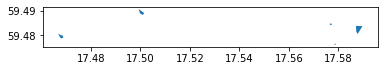

In [134]:
df.plot(figsize=(6, 6))
plt.show()

In [135]:
m = folium.Map(location=[59.48,17.58], zoom_start=14, tiles='openstreetmap')
for _, r in df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [136]:
df['centroid'] = df.centroid

In [137]:
df.head()

,geometry,osm_id,code,fclass,name,centroid
0,"POLYGON ((17.57646 59.48453, 17.57703 59.48405...",3406194,7201,forest,None,POINT (17.57699 59.48446)
1,"POLYGON ((17.49926 59.49062, 17.49993 59.48877...",3406059,7201,forest,Ärtskär,POINT (17.50040 59.48925)
2,"POLYGON ((17.58714 59.48377, 17.58729 59.48146...",3406854,7201,forest,Svanholmen,POINT (17.58815 59.48258)
3,"POLYGON ((17.46672 59.48054, 17.46789 59.47869...",3406913,7201,forest,Grässkär,POINT (17.46792 59.47957)
4,"POLYGON ((17.57839 59.47624, 17.57875 59.47607...",3406733,7201,forest,Stora Länsman,POINT (17.57871 59.47636)


In [138]:
for _, r in df.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='Name:&nbsp;<b>{}</b> <br> Class:&nbsp;<a href="https://wiki.openstreetmap.org/wiki/Tag:landuse={}" target="_blank">{}</a> <br> <i>Code:&nbsp;{}</i>'.format(r['name'], r['fclass'], r['fclass'], r['code'])).add_to(m)

m